# Porto Seguro's Safe Driver Prediction
## EDA and model
## Tor Helge Huse

EDA based on several good kernels.

Aim is to build a final model based on several stacked models.

In [1]:
### Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Seaborn style
sns.set_style("whitegrid")

In [8]:
### Let's import our data
path = 'C:/Data/Kaggle/PortoSeguro/'
#path = ''
train_data = pd.read_csv(path+'train.csv',na_values=-1, sep=';')
test_data = pd.read_csv(path+'test.csv',na_values=-1, sep=',')
print('Number rows and columns:',train_data.shape)
print('Number rows and columns:',test_data.shape)

Number rows and columns: (595212, 59)
Number rows and columns: (892816, 58)


In [9]:
train_data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [10]:
test_data.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1.0,8,1.0,0.0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2.0,5,1.0,0.0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1.0,3,0.0,0.0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1.0,6,0.0,0.0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1.0,7,0.0,0.0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [11]:
### ... check for NAs in sense Pandas understands them
train_data.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [12]:
test_data.isnull().sum()

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [23]:
### Now let's prepare lists of numeric, categorical and binary columns
# All features
all_features = train_data.columns.tolist()
all_features.remove('target')
# Numeric Features
numeric_features = [x for x in all_features if x[-3:] not in ['bin', 'cat']]
#numeric_features += ['target']
# Categorical Features
categorical_features = [x for x in all_features if x[-3:]=='cat']
# Binary Features
binary_features = [x for x in all_features if x[-3:]=='bin']

In [14]:
### Adding new column with beautiful target names
train_data['target_name'] = train_data['target'].map({0: 'No claim filed', 1: 'Claim filed'})

### Target Exploration

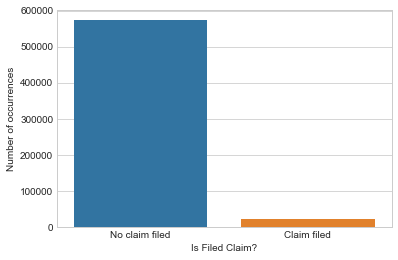

In [15]:
### Target variable exploration
sns.countplot(train_data.target_name);
plt.xlabel('Is Filed Claim?');
plt.ylabel('Number of occurrences');
plt.show()

### Corralation between features (variables)

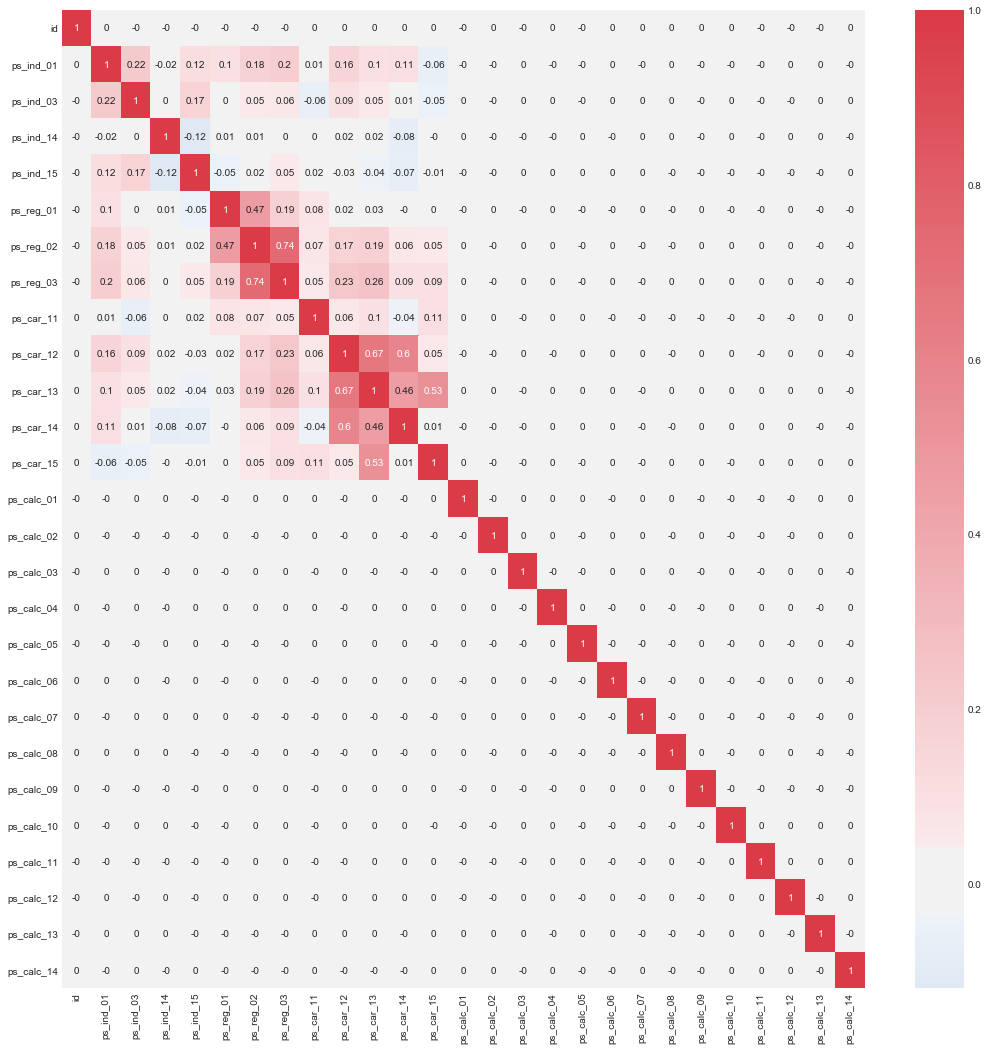

In [24]:
### Corralation matrix heatmap
# Getting correlation matrix
cor_matrix = train_data[numeric_features].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

it seems that the _calc_ features doesn't add anything or are in any way related to the target. Will probably not use them in the first versions

### Numeric Features Exploration

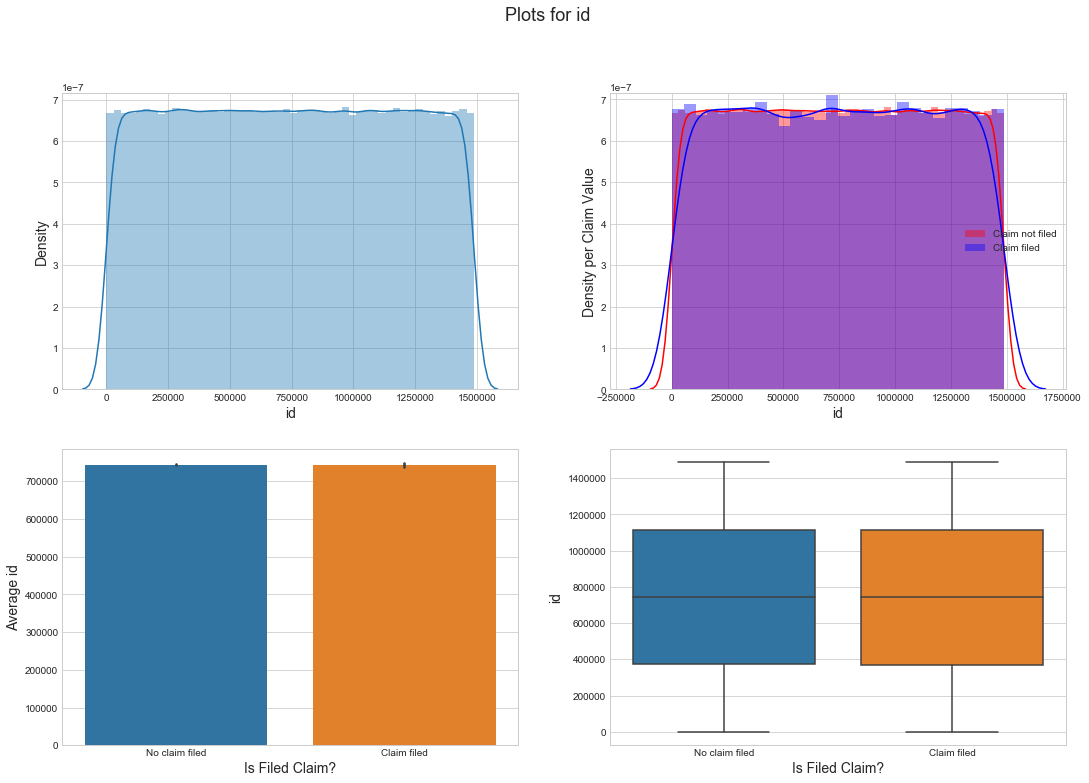

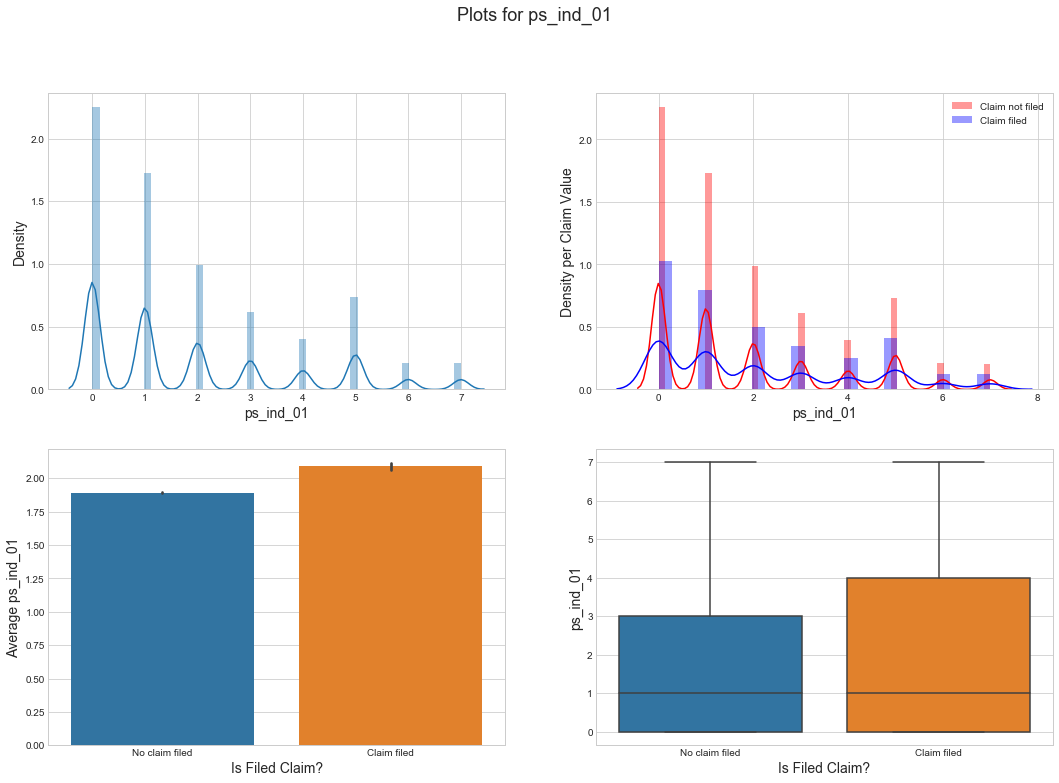

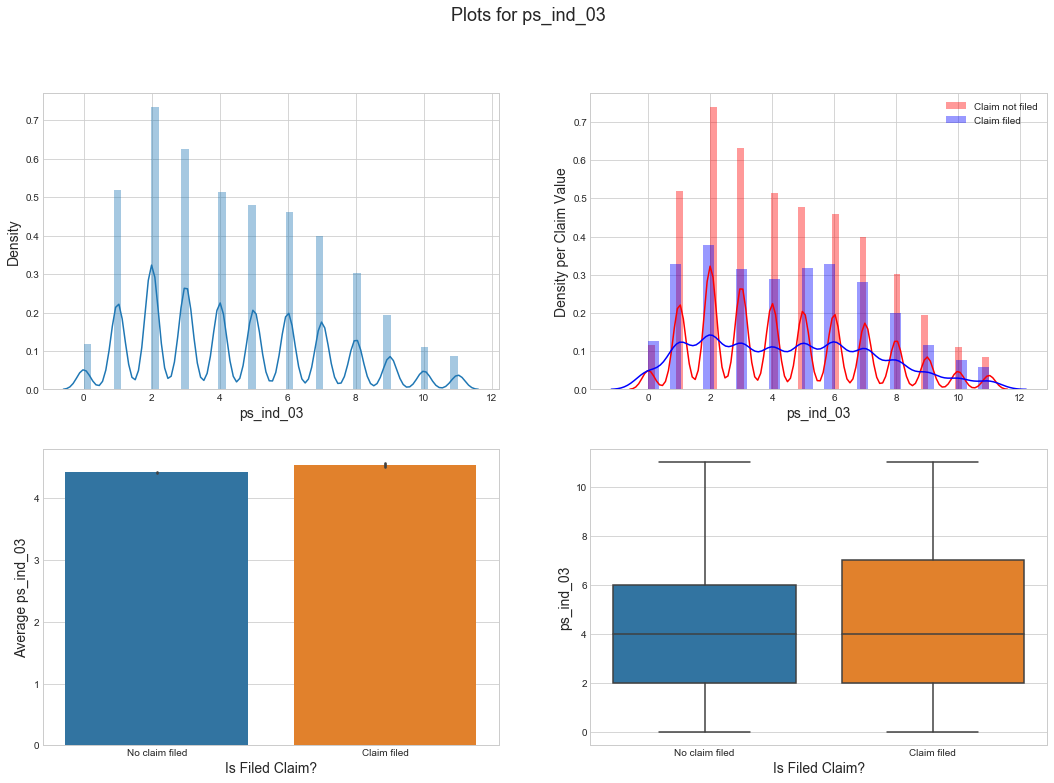

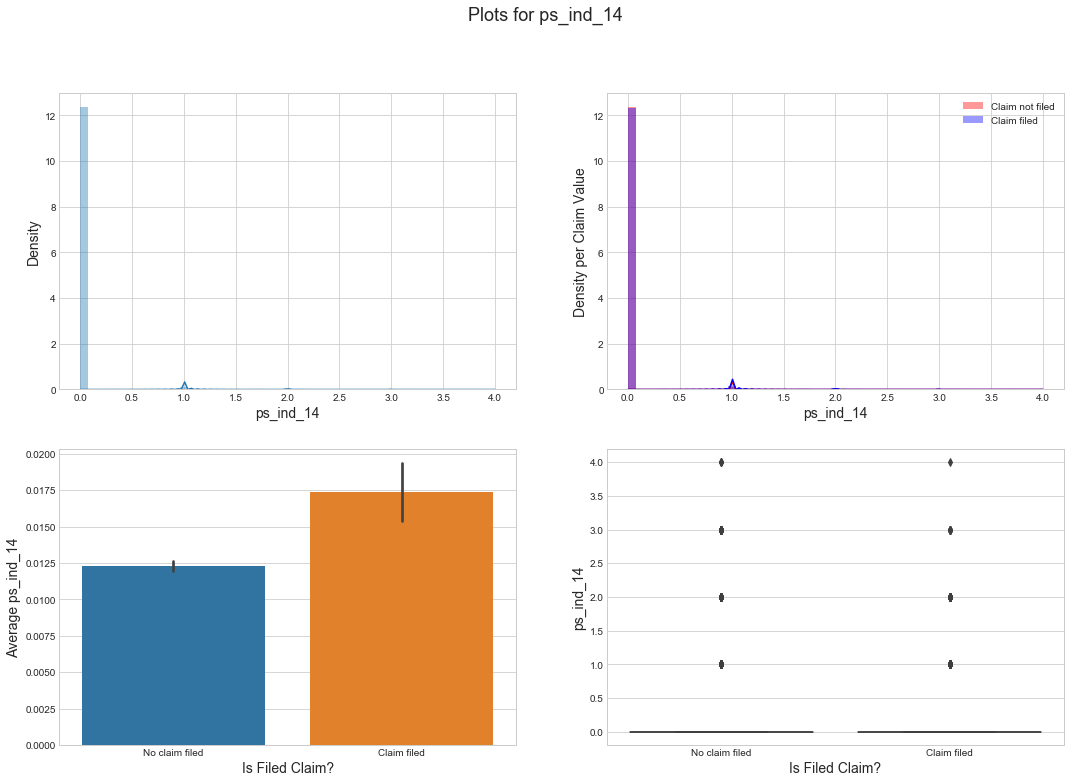

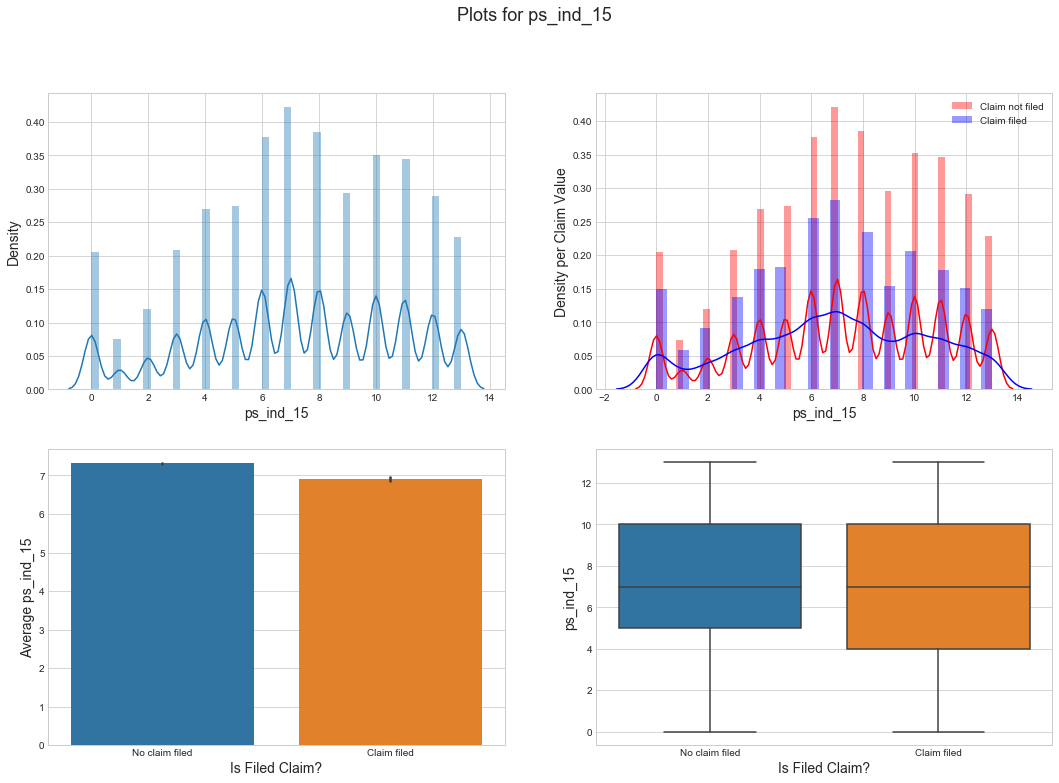

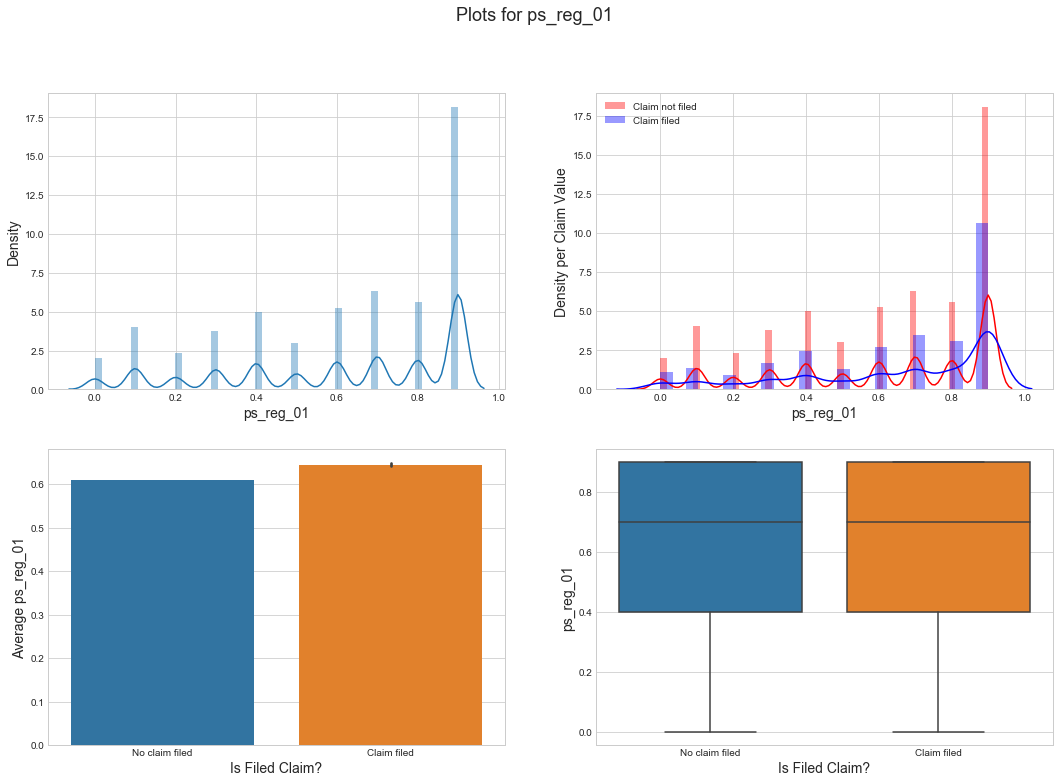

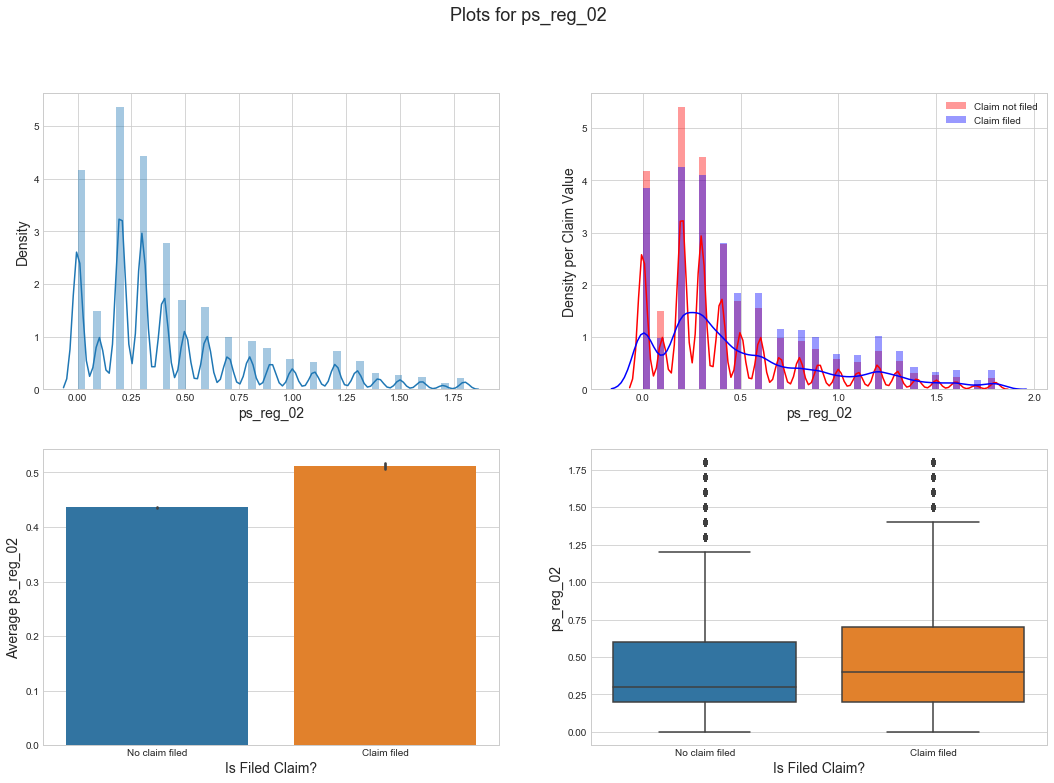

ValueError: cannot convert float NaN to integer

In [25]:
### Plotting Numeric Features
# Looping through and Plotting Numeric features
for column in numeric_features:    
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Distribution plot
    sns.distplot(train_data[column], ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Distribution per Claim Value
    # Claim Not Filed hist
    sns.distplot(train_data.loc[train_data.target==0, column], color='red', label='Claim not filed', ax=plt.subplot(222));
    # Claim Filed hist
    sns.distplot(train_data.loc[train_data.target==1, column], color='blue', label='Claim filed', ax=plt.subplot(222));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density per Claim Value', fontsize=14);
    
    ### Average Column value per Claim Value
    sns.barplot(x="target_name", y=column, data=train_data, ax=plt.subplot(223));
    # X-axis Label
    plt.xlabel('Is Filed Claim?', fontsize=14);
    # Y-axis Label
    plt.ylabel('Average ' + column, fontsize=14);
    
    ### Boxplot of Column per Claim Value
    sns.boxplot(x="target_name", y=column, data=train_data, ax=plt.subplot(224));
    # X-axis Label
    plt.xlabel('Is Filed Claim?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);
    # Printing Chart
    plt.show()

### Categorical Features Exploration

In [ ]:
### Plotting Categorical Features
# Looping through and Plotting Categorical features
for column in categorical_features:
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Number of occurrences per categoty - target pair
    ax = sns.countplot(x=column, hue="target_name", data=train_data, ax = plt.subplot(211));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14)
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 1000,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 

    
    ### Filed Claims percentage for every value of feature
    sns.pointplot(x=column, y='target', data=train_data, ax = plt.subplot(212));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Filed Claims Percentage', fontsize=14);
    # Printing Chart
    plt.show()

### Binary Features Exploration

In [ ]:
### Plotting Binary Features
# Looping through and Plotting Binary features
for column in binary_features:
    ### Figure initiation 
    fig = plt.figure(figsize=(18,12))
    
    ### Number of occurrences per binary value - target pair
    ax = sns.countplot(x=column, hue="target_name", data=train_data, ax = plt.subplot(211));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14)
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 1000,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 
        

    ### Filed Claims percentage for every value of feature
    sns.pointplot(x=column, y='target', data=train_data, ax = plt.subplot(212));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Filed Claims Percentage', fontsize=14);
    # Printing Chart
    plt.show()

Please upvote if my notebook helped you in any way :)